# Homework 09
This homework is based on the classification and regression lectures.

## Question 1
#### In the table below, fill in the definition column with a short (no more than two sentence) definition for each vocab word. If it can be summarized by a formula, give the formula. 

| Vocab Word | Definition |
|:--------|:--------|
| **One-hot coding** | **Assigning numerical values to categorical variables**   |
| **Feature selection*** | **Choosing the most relavent variables for building a model to improve performance and reduce overfitting** |
| **Classifier** | **An Algorithm that alligns input data to one of several predefined categories or classes** |
| **Precision** | **The proportion of correctly predicted positive cases out of all predicted positive cases** |
| **Recall** | **The proportion of correctly predicted positive cases pur of all actual positive cases** |
| **F1 Score** | **The mean of precision and recall. It balances false positives and false negatives** |
| **Parsimonious model** | **A simple model that explains the data well with as few parameters as possible, avoiding unnecessary complexitiy** |
| **Ridge regression** | **A linear regression technique with L2 regularization that penalizes large coefficients to reduce overfitting** |
| **LASSO regression** | **A linear rgression technique with L1 regulaization that can shrink some coefficients to zero, performing varianles selection** |
| **Cross validation** | **A model evaluation method that splits the data into multiple folds into train and test repeatedly, ensuring performance generalizes across samples** |
| **Tree based methods** | **Algorithms that use dicision tree to model relationships between variables** |

*Just give the general idea.

## Question 2 
#### a) What shape does a perfect classifier look like on an ROC curve? What about a bad classifier?
#### b) Think about the formula for an F1 score. What does it mean when the F1 score is close to 1? Close to 0?

a) A perfect classifier has an ROC curve that goes straight up the left side and then across the top - forming a square corner. A bad classifier follows the diagonal line from bottom left to the top right 

In [ ]:
When the F1 score is close to 1, it means the model has high precision and high recall. It correctly identifies most positives and makes few false predictions 

When the F1 scores is close to 0, it means either precision, recal or both ore very low, so the model performs poorly at identifying positive cases accurately.

## Question 3
#### Compare the following aspects of linear vs. logistic regression.
|  | Linear | Logistic |
|:--------|:--------|:--------|
| **Chart Shape** | **Straight line** | **S- shaped** |
| **Dependent Variable Type** | **Continuous** | **dichotomous yes/no** |
| **Purpose** (regression or classification) | **Regression** | **Classification** |
| **Range of output variable** ($y_i$ or $p_i$) | *infinite range* | **0 to 1** |
| **Method*** | **Ordinary Least Squares** | **Mavimum likelihood estimation** |
| **Example of use** | **Predicting house prices based on other features** | **Predicting weather a exposure to ACE's results in mental illness(yes/no)** |  
  
*Meaning ordinary least squares or maximum likelihood estimation

## Question 4
#### Why is it important to train then test our model? How do we do that? (2-3 sentences. Not looking for code, just general explanation).

In [ ]:
It is important to train and then test our models, because, the models that do both at the same time tend to perform poorly when given new data. To make a model that would predict well on new data, we want to split the data and train in part of the data and test the model to see how it performs. This helps check for underfitting and overfitting. 

## Question 5
This question runs through a linear regression example. We want to predict median house value based on the other variables.
#### a) First, load the `housing.csv` data set. Look at the data in some useful way. Why is linear regression appropriate here?

In [5]:
library(tidyverse)
housing <- read_csv("housing.csv")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 20640 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (8): longitude, latitude, housing_median_age, total_rooms, population, h...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [18]:
glimpse(housing)
head(housing)

Rows: 20,640
Columns: 8
$ longitude          <dbl> -122.23, -122.22, -122.24, -122.25, -122.25, -122.2…
$ latitude           <dbl> 37.88, 37.86, 37.85, 37.85, 37.85, 37.85, 37.84, 37…
$ housing_median_age <dbl> 41, 21, 52, 52, 52, 52, 52, 52, 42, 52, 52, 52, 52,…
$ total_rooms        <dbl> 880, 7099, 1467, 1274, 1627, 919, 2535, 3104, 2555,…
$ population         <dbl> 322, 2401, 496, 558, 565, 413, 1094, 1157, 1206, 15…
$ households         <dbl> 126, 1138, 177, 219, 259, 193, 514, 647, 595, 714, …
$ median_income      <dbl> 8.3252, 8.3014, 7.2574, 5.6431, 3.8462, 4.0368, 3.6…
$ median_house_value <dbl> 452600, 358500, 352100, 341300, 342200, 269700, 299…


longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-122.23,37.88,41,880,322,126,8.3252,452600
-122.22,37.86,21,7099,2401,1138,8.3014,358500
-122.24,37.85,52,1467,496,177,7.2574,352100
-122.25,37.85,52,1274,558,219,5.6431,341300
-122.25,37.85,52,1627,565,259,3.8462,342200
-122.25,37.85,52,919,413,193,4.0368,269700


In [ ]:
Linear regression is appropriate here since all the date is numerical and we could establish the linear relationnship between variables

In [17]:
names(housing) <- names(housing) %>%
  str_replace_all("-","_") %>%
  str_replace_all("[^_A-Za-z0-9]*","") %>%
  str_to_lower()

#### b) Scale data and split it 75/25 training/testing. Set seed = 123.

In [19]:
scaled <- scale(housing)

In [20]:
set.seed(123)

housing_num <- housing %>% select(where(is.numeric)) %>%
  mutate(across(where(is.numeric), scale))

train <- runif(nrow(housing_num)) < 0.75
test <- !train

#### c) Fit the model.

In [21]:
f <- median_house_value ~ housing_median_age + total_rooms + population + households+ median_income
m <- lm(f, data=housing_num %>% filter(train))
summary(m)


Call:
lm(formula = f, data = housing_num %>% filter(train))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.27209 -0.10001 -0.02338  0.07256  0.95932 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.058345   0.004810  -12.13   <2e-16 ***
housing_median_age  0.196973   0.005444   36.18   <2e-16 ***
total_rooms        -1.078389   0.067938  -15.87   <2e-16 ***
population         -3.209320   0.099893  -32.13   <2e-16 ***
households          2.781972   0.066686   41.72   <2e-16 ***
median_income       1.372480   0.010900  125.92   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1555 on 15558 degrees of freedom
Multiple R-squared:  0.5711,	Adjusted R-squared:  0.571 
F-statistic:  4144 on 5 and 15558 DF,  p-value: < 2.2e-16


#### d) Make predictions on test data and show them in an actual vs. predicted plot.

Warning message in geom_segment(aes(x = 0, y = 0, xend = 1, yend = 1)):
“All aesthetics have length 1, but the data has 5076 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing a
  single row.”


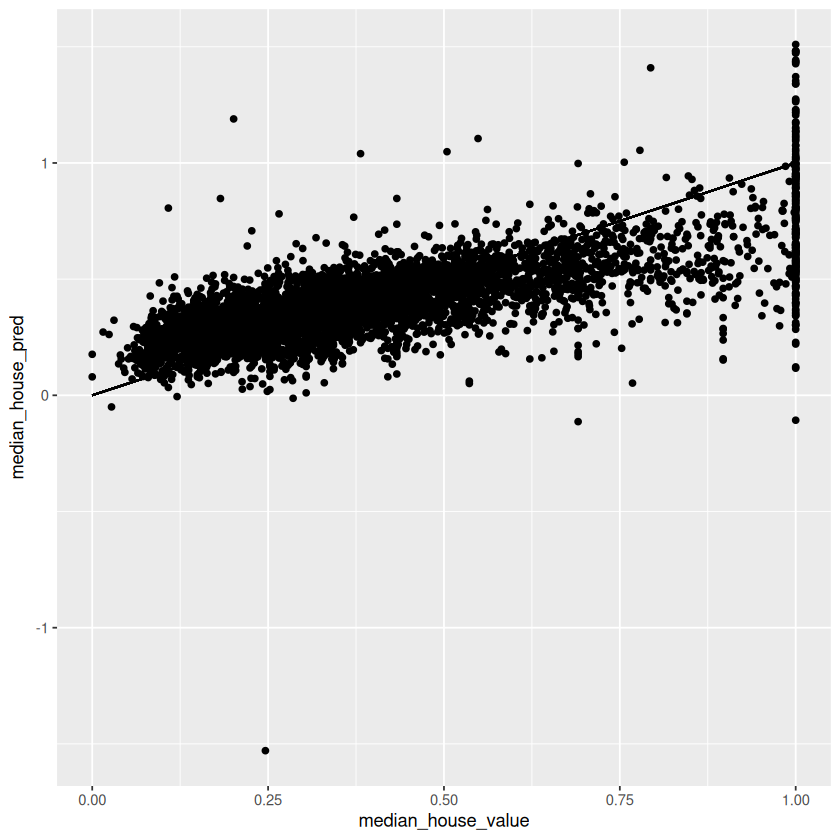

In [27]:
dx <- housing_num %>% filter(test)

dx <- dx %>% 
  mutate(median_house_pred = predict(m, newdata = as.data.frame(dx)))

ggplot(dx, aes(median_house_value, median_house_pred)) + geom_point() + geom_segment(aes(x=0,y=0,xend=1,yend=1))


#### e) Make a residuals plot.

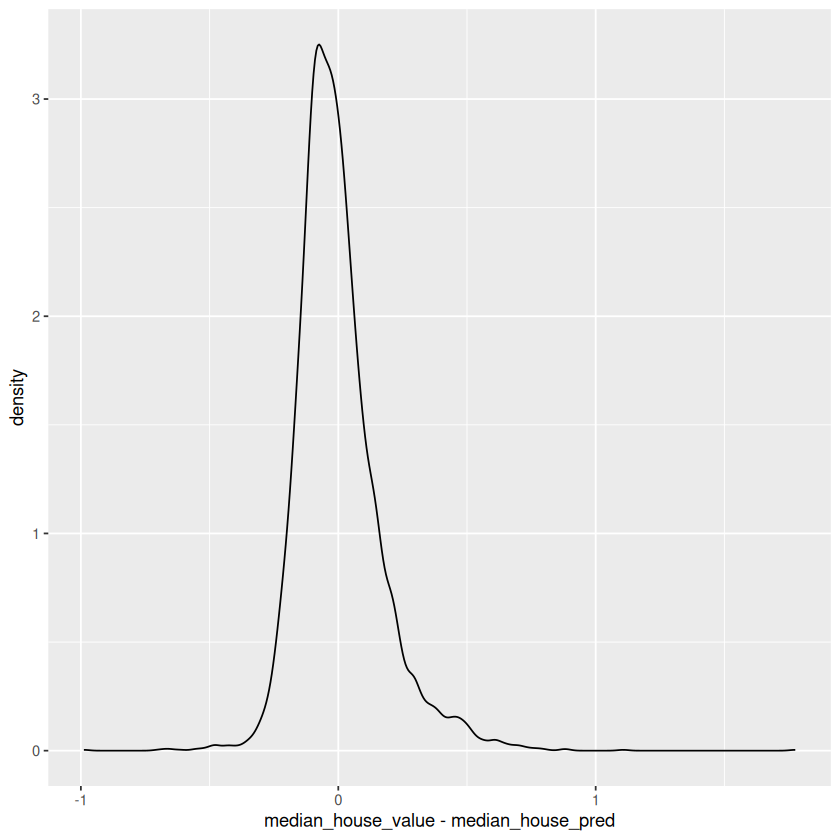

In [29]:
ggplot(dx, aes(median_house_value-median_house_pred)) + geom_density()

## Question 6
This question runs through a logistic regression example. We want to predict diabetes diagnosis based on the other variables. 
#### a) First, load the `diabetes.csv` data set. Look at the data in some useful way. Why is logistic regression appropriate here?

In [30]:
diabetes<- read_csv("diabetes.csv")

Rows: 768 Columns: 9
── Column specification ──────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [33]:
head(diabetes)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


#### b) Scale data and split it 75/25 training/testing. Set seed = 123.

In [59]:
set.seed(123)

diabetes_num <- diabetes %>%
  select(where(is.numeric)) %>%
  mutate(across(where(is.numeric), scale))

train_index <- runif(nrow(diabetes_num)) < 0.75

train <- diabetes_num[train_index, ]
test <- diabetes_num[!train_index, ]

#### c) Fit the model.

In [61]:
model_log <- glm(Outcome ~ ., data = train, family = "binomial")
summary(model_log)


Call:
glm(formula = Outcome ~ ., family = "binomial", data = train)

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -8.4200     0.8268 -10.184  < 2e-16 ***
Pregnancies                1.6903     0.6650   2.542   0.0110 *  
Glucose                    7.5206     0.8961   8.393  < 2e-16 ***
BloodPressure             -1.5283     0.7855  -1.946   0.0517 .  
SkinThickness             -0.3911     0.7976  -0.490   0.6239    
Insulin                   -1.2607     0.9116  -1.383   0.1667    
BMI                        6.3446     1.2121   5.234 1.66e-07 ***
DiabetesPedigreeFunction   2.1300     0.8296   2.567   0.0102 *  
Age                        1.4178     0.6856   2.068   0.0386 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 744.25  on 574  degrees of freedom
Residual deviance: 524.03  on 566  degrees of freedom
AIC: 542.03

Number of

#### d) Make predictions on test data. Print a table with the number of true positives, false positives, true negatives, false negatives, and accuracy. 

In [67]:
# d) Predictions and performance metrics
pred_probs <- predict(model_log, newdata = test, type = "response")
pred_class <- ifelse(pred_probs > 0.5, 1, 0)

# Confusion matrix
conf_matrix <- table(Predicted = pred_class, Actual = test$Outcome)
conf_matrix

# Extract performance metrics
TP <- conf_matrix[2, 2]
TN <- conf_matrix[1, 1]
FP <- conf_matrix[2, 1]
FN <- conf_matrix[1, 2]

accuracy <- (TP + TN) / sum(conf_matrix)

cat("True Positives:", TP, "\n")
cat("False Positives:", FP, "\n")
cat("True Negatives:", TN, "\n")
cat("False Negatives:", FN, "\n")
cat("Accuracy:", round(accuracy, 4), "\n")


         Actual
Predicted   0   1
        0 105  30
        1  21  37

True Positives: 37 
False Positives: 21 
True Negatives: 105 
False Negatives: 30 
Accuracy: 0.7358 


#### e) Fit a LASSO-regularized logistic regression model. Again, set seed = 123. Which variables are the most important (which ones don't go to zero)? How does the LASSO model affect the accuracy?

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘RcppEigen’


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-10



9 x 1 sparse Matrix of class "dgCMatrix"
                         lambda.min
(Intercept)              -8.1804229
Pregnancies               1.6114389
Glucose                   7.2940312
BloodPressure            -1.3232176
SkinThickness            -0.2975239
Insulin                  -1.0917302
BMI                       5.9615320
DiabetesPedigreeFunction  1.9562843
Age                       1.3575591

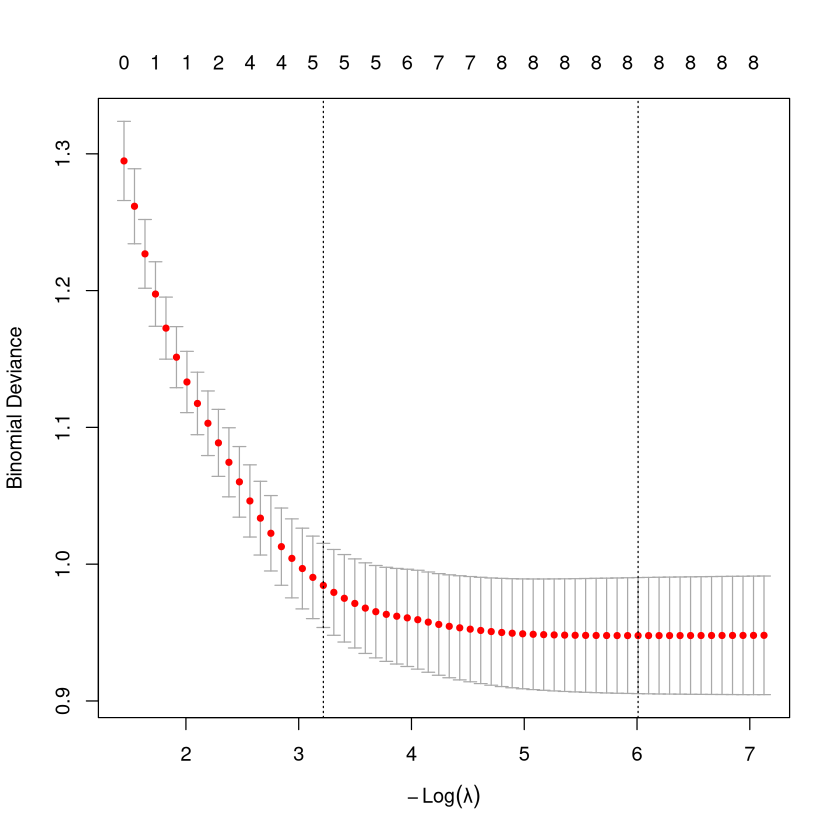

In [64]:
install.packages("glmnet")
library(glmnet)

set.seed(123)

# Prepare matrices for glmnet
x_train <- as.matrix(train %>% select(-Outcome))
y_train <- train$Outcome

# Fit LASSO (alpha = 1 means pure LASSO)
lasso_model <- cv.glmnet(x_train, y_train, alpha = 1, family = "binomial")

# Plot cross-validation curve
plot(lasso_model)

# Find coefficients at best lambda
coef_lasso <- coef(lasso_model, s = "lambda.min")
coef_lasso


In [69]:
# Predict on test data
x_test <- as.matrix(test %>% select(-Outcome))
pred_probs_lasso <- predict(lasso_model, newx = x_test, s = "lambda.min", type = "response")
pred_class_lasso <- ifelse(pred_probs_lasso > 0.5, 1, 0)

# Confusion matrix
conf_matrix_lasso <- table(Predicted = pred_class_lasso, Actual = test$Outcome)
conf_matrix_lasso

# Accuracy
accuracy_lasso <- sum(diag(conf_matrix_lasso)) / sum(conf_matrix_lasso)
cat("LASSO Model Accuracy:", round(accuracy_lasso, 4), "\n")


         Actual
Predicted   0   1
        0 105  31
        1  21  36

LASSO Model Accuracy: 0.7306 


#### f) Make a plot of actual vs. predicted values for the LASSO model.

`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.005”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 1.005”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 1.01”


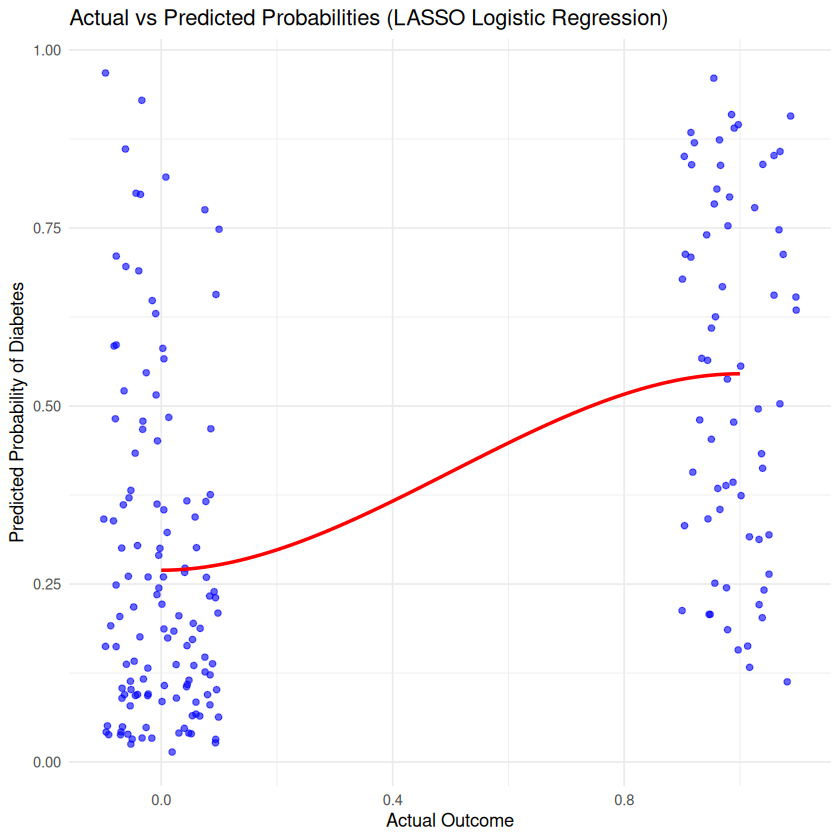

In [70]:
library(ggplot2)

lasso_plot_data <- data.frame(
  Actual = test$Outcome,
  Predicted_Prob = as.numeric(pred_probs_lasso)
)

ggplot(lasso_plot_data, aes(x = Actual, y = Predicted_Prob)) +
  geom_jitter(width = 0.1, height = 0, alpha = 0.6, color = "blue") +
  geom_smooth(method = "loess", color = "red", se = FALSE) +
  labs(
    title = "Actual vs Predicted Probabilities (LASSO Logistic Regression)",
    x = "Actual Outcome",
    y = "Predicted Probability of Diabetes"
  ) +
  theme_minimal()
